# RelaxDeclarativeConstraints: Tutorial
This notebook provides a brief tutorial on how to use RelaxDeclarativeConstraints tool step-by-step to generate constraints from a business process model, i.e., sound, free-choice workflow net, in the context of process mining. Alternatively, we can the run tool from the command line, as explained in the [README](https://github.com/rehman-qureshi/RelaxDeclarativeConstraints/blob/main/README.md) document.

RelaxDeclarativeConstraints translate the business process model into declarative constraints. These constraints are used for immediate process insights regarding business process management.  

# Import Required Libraries
First, we import the necessary libraries, including `sys`, `os`, `display`, `Image` and the custom modules: `create_alpha_relations_matrix`, `relaxing_declarative_constraints`, and `visualize_pnml_model`. The functionalities of custom modules are briefly explained in the [README](https://github.com/rehman-qureshi/RelaxDeclarativeConstraints/blob/main/README.md) document. 

In [1]:
# Import Required Libraries
import sys
import os
from create_alpha_relations_matrix import matrix_function
from relaxing_declarative_constraints import relax_constraints_function
from visualize_pnml_model import visualize_function
from IPython.display import Image, display

# Input: Business Process Model
RelaxDeclarativeConstraitns tool takes process model in pnml format as an input from the [data](https://github.com/rehman-qureshi/RelaxDeclarativeConstraints/tree/main/data) folder, and generates three files as output, i.e., process model in PNG format, alpha relation matrix and declarative constraints in csv format in the [output](https://github.com/rehman-qureshi/RelaxDeclarativeConstraints/tree/main/output) folder.

In [2]:
# Input business process model in pnml format
pnml_path = './data/goods_shipping_company.pnml' 
# We need to change the pnml_path variable for other business process models, such as ICPM conformance challenge 2020

# Output
# 1. Visualize PNML Model
The `visualize_function` is called with the PNML file path to visualize the business process model.

Visualization saved as .\output\goods_shipping_company.png


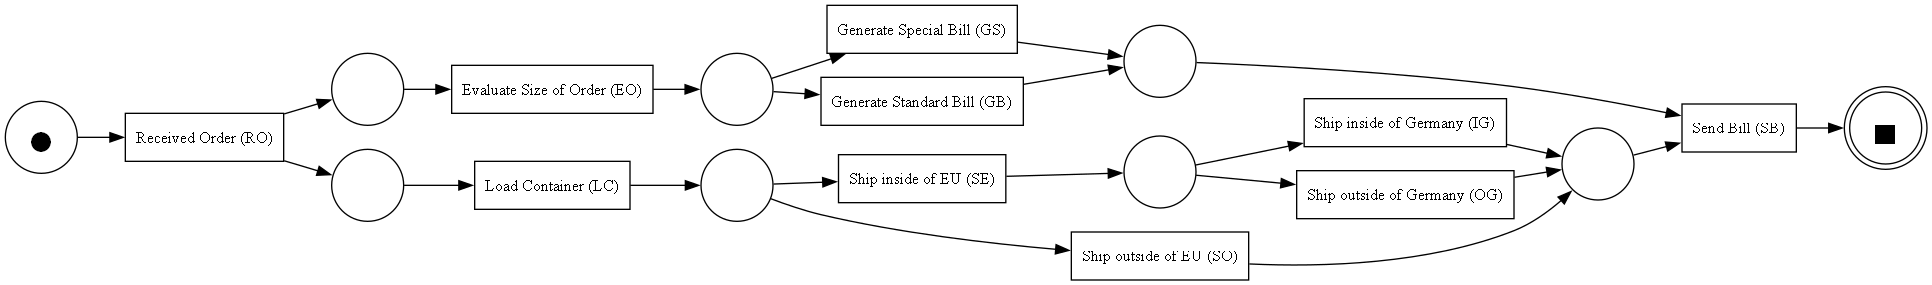

In [3]:
# Call the visualization function to fetch and show the business process model
output_image_path = visualize_function(pnml_path)
# Display the generated PNG file
if os.path.exists(output_image_path):
    display(Image(filename=output_image_path))
else:
    print("Visualization file not found. Please check the PNML file path and try again.")

# 2. Create Alpha Relations Matrix
The `matrix_function` is called to create the alpha relations matrix and retrieve the last transitions from the PNML model. It takes the PNML file path as input and returns:
- `df`: The alpha relations matrix as a DataFrame.
- `last_activities`: A set of the last activity or activities in the business process model.

If the matrix is successfully created, it proceeds to the next step; otherwise, it prints an error message.

In [4]:
# Call the matrix function
df, last_activties = matrix_function(pnml_path)
if df is not None:
    # display alpha relations matrix, which is created by using a business process model.'
    print("Alpha Relations Matrix of the business process model.")
    print(df) 
    # display the last transitions in the business process model
    print(f"Last activitiy or activities in the business process model: ",last_activties)
else:
    print("Failed to create the alpha relations matrix.")

Create Alpha-Relations Matrix
Matrix saved to output\goods_shipping_company_alpha_relations_matrix.csv
Alpha Relations Matrix of the business process model.
                     Unnamed: 0 Load Container (LC)  \
0           Load Container (LC)                   -   
1   Evaluate Size of Order (EO)                  ||   
2        Ship inside of EU (SE)                   ←   
3    Generate Special Bill (GS)                  ||   
4  Ship outside of Germany (OG)                   -   
5           Received Order (RO)                   →   
6       Ship outside of EU (SO)                   ←   
7   Ship inside of Germany (IG)                   -   
8   Generate Standard Bill (GB)                  ||   
9                Send Bill (SB)                   -   

  Evaluate Size of Order (EO) Ship inside of EU (SE)  \
0                          ||                      →   
1                           -                     ||   
2                          ||                      -   
3            

# 3. Derive Relaxed Declarative Constraints
The `relax_constraints_function` is called with the created alpha relations matrix, last transitions of business process model, and PNML file path to derive relaxed constraints.  
It takes the following parameters:
- `df`: The alpha relations matrix.
- `last_activties`: The last activity or activites before the termination of business process model.

In [5]:
if df is not None:
    # Fetch the last activity or activites before the termination of business process model
    print(f"The list of last activity or activities : ",last_activties)
    # Call the relax constraints function
    constraints_df=relax_constraints_function(df, last_activties)
    if constraints_df is not True:
        print("Failed to derived relaxed declarative constraints.")

The list of last activity or activities :  ['Send Bill (SB)']
Initial Constraints Set is determining ... 
Length of Initial Constraints Set: 43
Length of Transitive Closed Constraints Set: 12
Current Set of Transitive Closed Constraints:
('Received Order (RO)', 'Generate Standard Bill (GB)')
('Received Order (RO)', 'Generate Special Bill (GS)')
('Evaluate Size of Order (EO)', 'Send Bill (SB)')
('Received Order (RO)', 'Ship outside of EU (SO)')
('Received Order (RO)', 'Ship inside of EU (SE)')
('Load Container (LC)', 'Send Bill (SB)')
('Received Order (RO)', 'Send Bill (SB)')
('Load Container (LC)', 'Ship inside of Germany (IG)')
('Load Container (LC)', 'Ship outside of Germany (OG)')
('Received Order (RO)', 'Ship outside of Germany (OG)')
('Received Order (RO)', 'Ship inside of Germany (IG)')
('Ship inside of EU (SE)', 'Send Bill (SB)')
Current Set of Initial Constraints:
1: ('Ship outside of Germany (OG)', 'Evaluate Size of Order (EO)')
2: ('Load Container (LC)', 'Generate Standard Bi

Enter the number of the constraint you want to remove (e.g., 1, 2, etc.):  9


Removed Constraint: ('Generate Standard Bill (GB)', 'Ship inside of Germany (IG)')
Modified Initial Constraints Set: 42
Modified Transitive Closed Constraints Set: 9
('Received Order (RO)', 'Generate Special Bill (GS)')
('Evaluate Size of Order (EO)', 'Send Bill (SB)')
('Received Order (RO)', 'Ship outside of EU (SO)')
('Received Order (RO)', 'Ship inside of EU (SE)')
('Load Container (LC)', 'Send Bill (SB)')
('Received Order (RO)', 'Send Bill (SB)')
('Load Container (LC)', 'Ship outside of Germany (OG)')
('Received Order (RO)', 'Ship outside of Germany (OG)')
('Ship inside of EU (SE)', 'Send Bill (SB)')
Affected Transitive Closed Constraints Set: 3
('Received Order (RO)', 'Generate Standard Bill (GB)')
('Load Container (LC)', 'Ship inside of Germany (IG)')
('Received Order (RO)', 'Ship inside of Germany (IG)')


Do you want to remove more constraint from the Initial Constraints Set? (yes/no):  yes


Current Set of Initial Constraints:
1: ('Ship outside of Germany (OG)', 'Evaluate Size of Order (EO)')
2: ('Load Container (LC)', 'Generate Standard Bill (GB)')
3: ('Generate Standard Bill (GB)', 'Load Container (LC)')
4: ('Ship outside of Germany (OG)', 'Generate Special Bill (GS)')
5: ('Ship inside of Germany (IG)', 'Send Bill (SB)')
6: ('Evaluate Size of Order (EO)', 'Ship outside of EU (SO)')
7: ('Ship outside of EU (SO)', 'Evaluate Size of Order (EO)')
8: ('Generate Standard Bill (GB)', 'Ship outside of Germany (OG)')
9: ('Ship inside of EU (SE)', 'Ship inside of Germany (IG)')
10: ('Ship outside of Germany (OG)', 'Generate Standard Bill (GB)')
11: ('Ship inside of EU (SE)', 'Ship outside of Germany (OG)')
12: ('Evaluate Size of Order (EO)', 'Ship inside of EU (SE)')
13: ('Load Container (LC)', 'Ship outside of EU (SO)')
14: ('Ship inside of EU (SE)', 'Evaluate Size of Order (EO)')
15: ('Ship outside of EU (SO)', 'Generate Special Bill (GS)')
16: ('Load Container (LC)', 'Ship insi

Enter the number of the constraint you want to remove (e.g., 1, 2, etc.):  41


Removed Constraint: ('Load Container (LC)', 'Generate Special Bill (GS)')
Modified Initial Constraints Set: 41
Modified Transitive Closed Constraints Set: 6
('Evaluate Size of Order (EO)', 'Send Bill (SB)')
('Received Order (RO)', 'Ship outside of EU (SO)')
('Received Order (RO)', 'Ship inside of EU (SE)')
('Received Order (RO)', 'Send Bill (SB)')
('Received Order (RO)', 'Ship outside of Germany (OG)')
('Ship inside of EU (SE)', 'Send Bill (SB)')
Affected Transitive Closed Constraints Set: 6
('Load Container (LC)', 'Ship outside of Germany (OG)')
('Received Order (RO)', 'Generate Standard Bill (GB)')
('Load Container (LC)', 'Send Bill (SB)')
('Received Order (RO)', 'Generate Special Bill (GS)')
('Load Container (LC)', 'Ship inside of Germany (IG)')
('Received Order (RO)', 'Ship inside of Germany (IG)')


Do you want to remove more constraint from the Initial Constraints Set? (yes/no):  no


Updated constraints saved to output\declarative_constraints.csv
